# PROYECTO FINAL
Carolina Daniells Zaldívar

### Definir grafos con la matriz estableciendo umbrales de coactivacion de 0.8, 0.9 y 1 y graficar cada grafo. Añadir las coordenadas tridimencionales (incluidas en el archivo mat)

Para el grafo 0.2, existen las siguientes coordenadas de conexiones:

Conexión:  x:  [np.float64(7.55725190839695), np.float64(9.115879828326186)] y:  [np.float64(33.8320610687023), np.float64(22.454935622317606)] z [np.float64(23.511450381679396), np.float64(24.206008583690988)]
Conexión:  x:  [np.float64(-5.214035087719296), np.float64(-5.017094017094024)] y:  [np.float64(-12.526315789473685), np.float64(-5.7521367521367495)] z [np.float64(42.11929824561403), np.float64(37.66666666666667)]
Conexión:  x:  [np.float64(-5.198237885462561), np.float64(-5.677419354838705)] y:  [np.float64(17.823788546255514), np.float64(26.66129032258064)] z [np.float64(36.889867841409696), np.float64(40.314516129032256)]
Conexión:  x:  [np.float64(-8.016597510373444), np.float64(-6.0297029702970235)] y:  [np.float64(-38.016597510373444), np.float64(-38.00990099009901)] z [np.float64(48.73858921161826), np.float64(40.95049504950495)]
Conexión:  x:  [np.float64(-6.114942528735625), np.float64(-4.2571428571

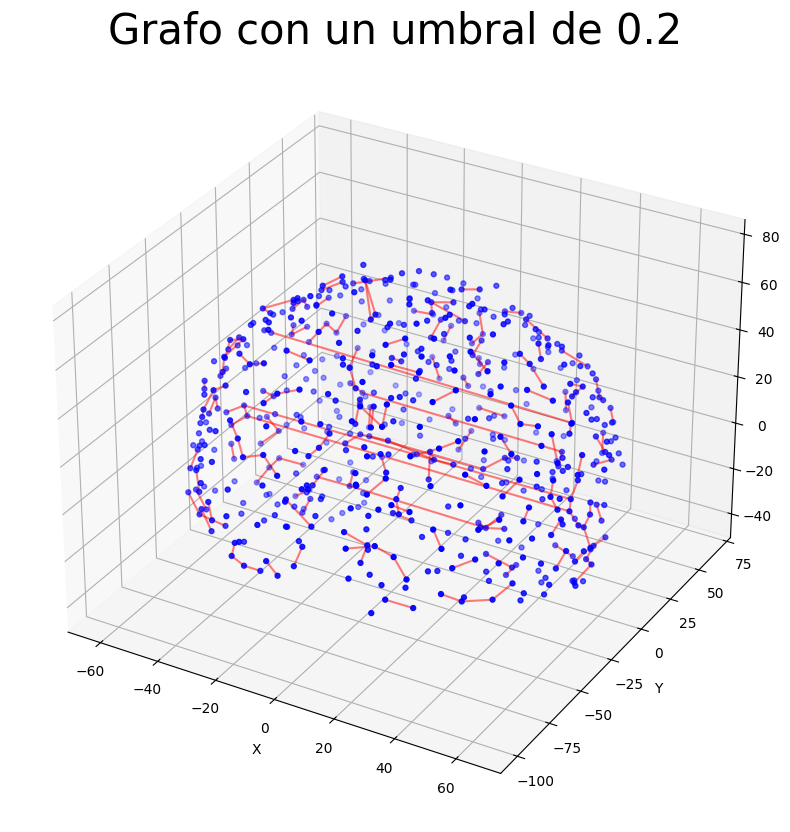

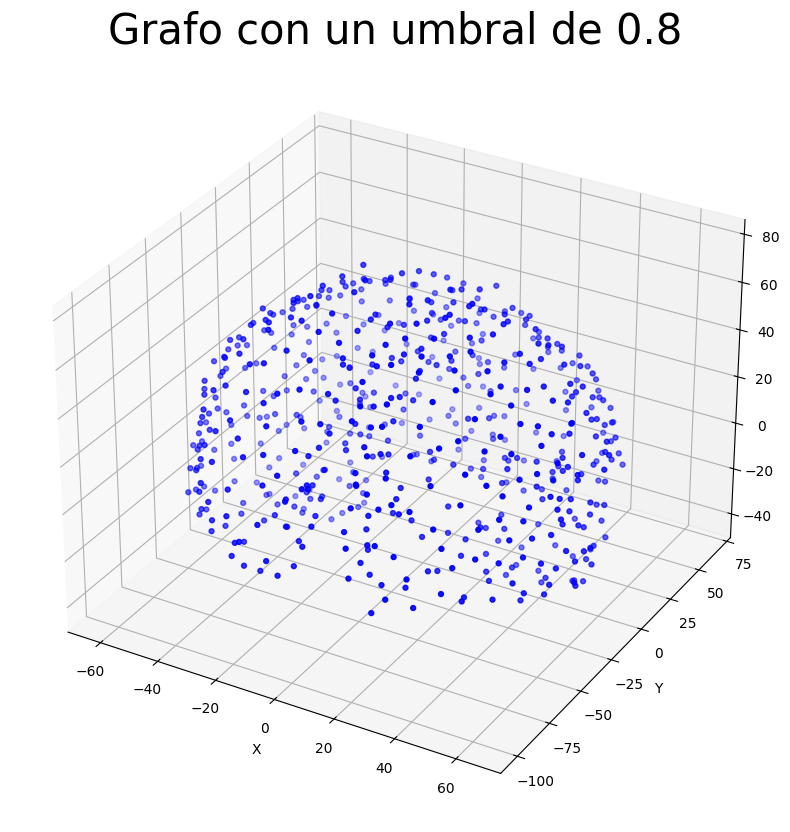

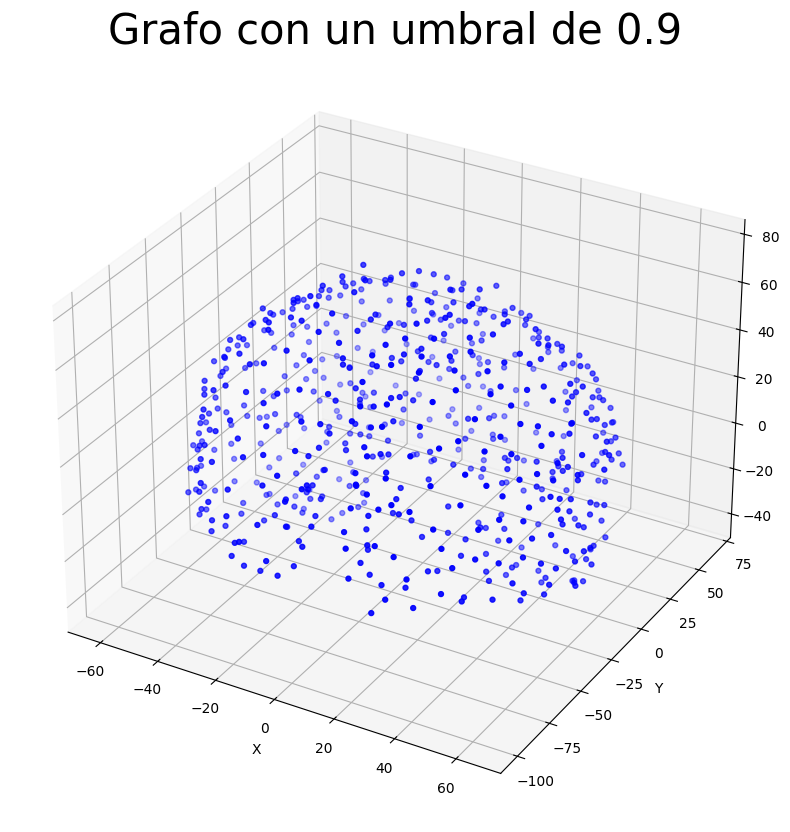

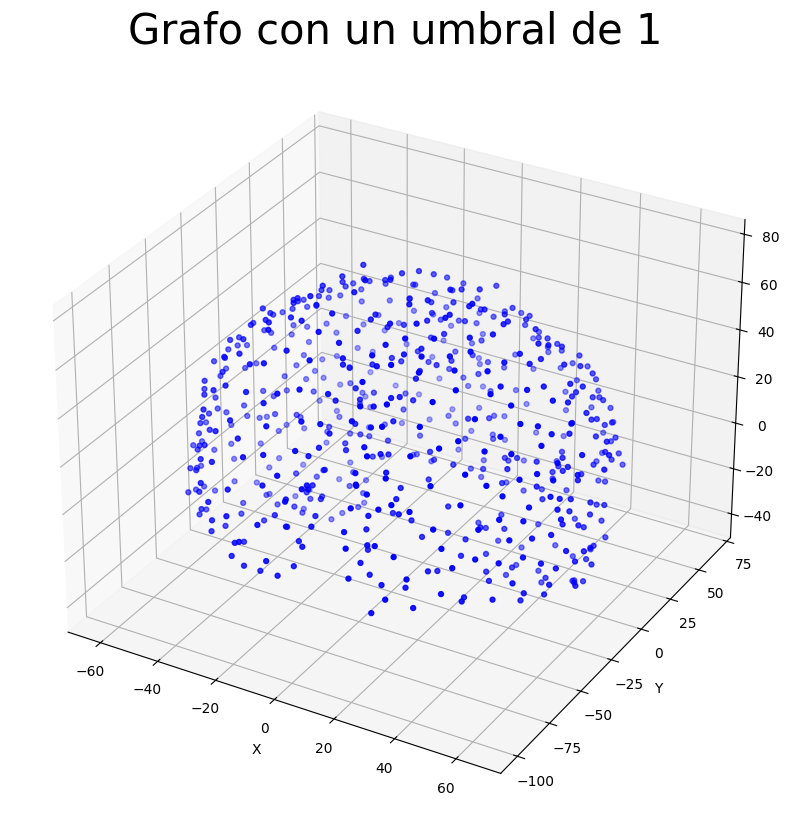

In [34]:
import scipy.io as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

data = sp.loadmat(r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\5o semestre\Modelos\PROYECTO FINAL MODELOS dump\FinalModelosCode\Coactivation_matrix.mat")
coactivation_matrix = data['Coactivation_matrix']
coord = data['Coord']
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]
m = 0

umbrales = [0.2, 0.8, 0.9, 1]

for u in umbrales:

    filtered_matrix= np.where(coactivation_matrix >= u, 1, 0)
    G = nx.from_numpy_array(filtered_matrix)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x, y, z, c='blue', s=50, marker='.')
    print(f'Para el grafo {u}, existen las sig coords de conexiones:\n')
    for edge in G.edges():
        node1, node2 = edge
        x_coords = [x[node1], x[node2]]
        y_coords = [y[node1], y[node2]]
        z_coords = [z[node1], z[node2]]
        ax.plot(x_coords, y_coords, z_coords, c='red', alpha=0.5)
        m+= 1
        print('Conexión: ','x: ', x_coords, 'y: ',y_coords, 'z',z_coords)
    
    ax.set_title(f'Grafo con un umbral de {u}', fontsize= 30)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.show()

### Con uno de los grafos en el punto uno con umbral 0.9, generar una animacion donde se haga girar el grafo del cerebro para visualizar las conexiones establecidas.

#### Se utilizó un umbral de 0.2 porque con el resto de umbrales no se observaban las conexiones.

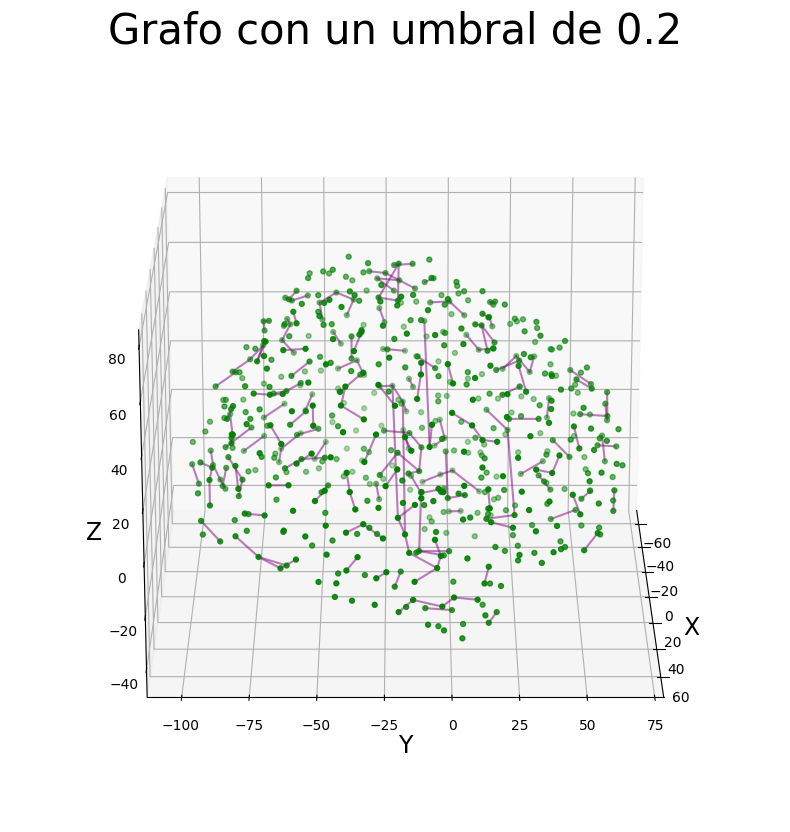

In [36]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
import scipy.io as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

data = sp.loadmat(r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\5o semestre\Modelos\PROYECTO FINAL MODELOS dump\FinalModelosCode\Coactivation_matrix.mat")
coactivation_matrix = data['Coactivation_matrix']
coord = data['Coord']
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]
filtered_matrix= np.where(coactivation_matrix >= 0.2, coactivation_matrix, 0)
G= nx.from_numpy_array(filtered_matrix)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c='green', s=50, marker='.')

for edge in G.edges():
    node1, node2 = edge
    x_coords = [x[node1], x[node2]]
    y_coords = [y[node1], y[node2]]
    z_coords = [z[node1], z[node2]]
    ax.plot(x_coords, y_coords, z_coords, c='purple', alpha=0.5)

ax.set_title(f'Grafo con un umbral de 0.2', fontsize= 30)
ax.set_xlabel('X', fontsize= 17)
ax.set_ylabel('Y', fontsize= 17)
ax.set_zlabel('Z', fontsize= 17)


def init():
    ax.view_init(elev=20, azim=0)
    return fig,

def animate(frame):
    ax.view_init(elev=20, azim=frame)
    return fig,

animacion = FuncAnimation(fig, animate, init_func=init, frames=360, interval=50, blit=False)



### Encontrar los hubs del grafo, y establecer el tamaño del nodo proporcional al valor del grado

Text(0.5, 0, 'Z')

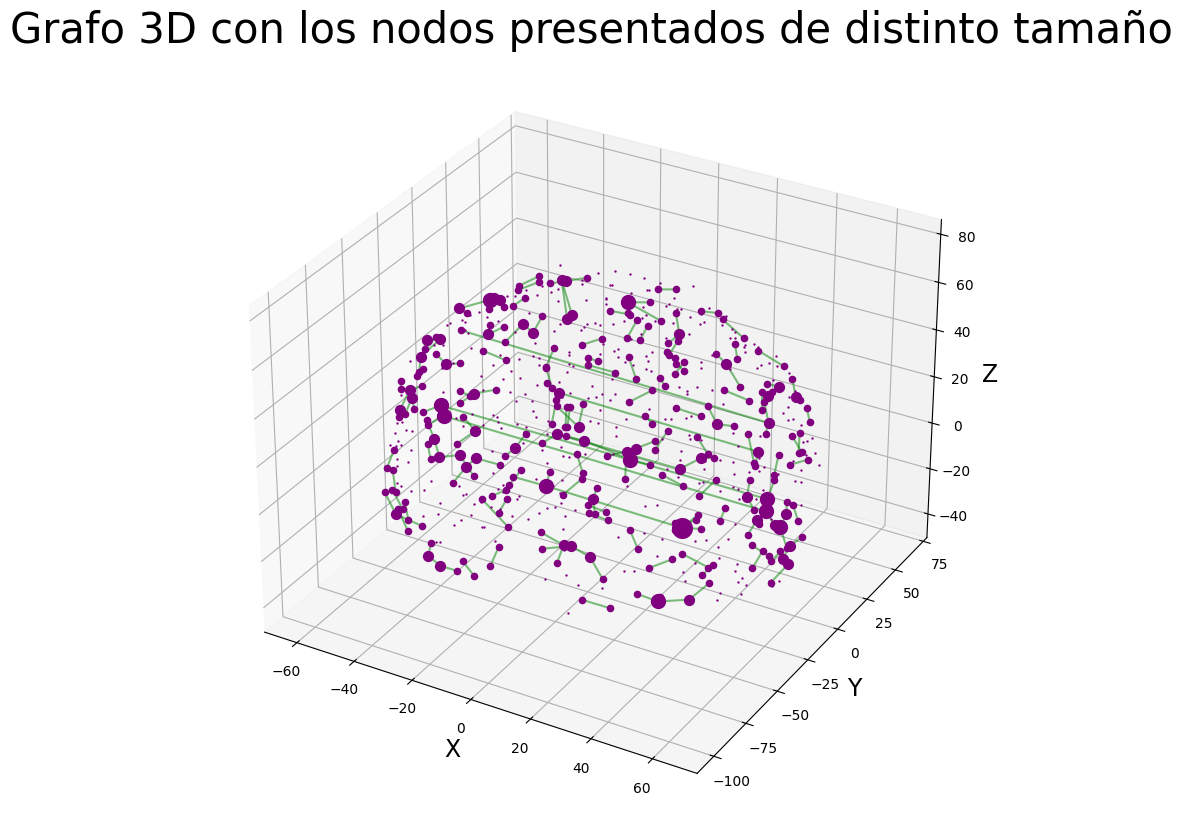

In [37]:
grados = dict(G.degree())
lista_grados = list(grados.values())
grado_maximo = max(lista_grados) 
grado_minimo = min(lista_grados)

tam_max = 1
tam_min = 100

grado_tamaño = {0:0.50, 1:20, 2:50, 3:100, 4:200}

c_m_02 = data['Coactivation_matrix']
filtered_matrix_02 = np.where(c_m_02 >= 0.2, c_m_02, 0)
G02= nx.from_numpy_array(filtered_matrix)
G01= nx.Graph()
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

figura = plt.figure(figsize= (10, 10))
Ax = figura.add_subplot(projection= '3d')

for nodo in grados.keys():
    valor= grados[nodo]
    tamaño= grado_tamaño[valor]
    Ax.scatter(x[nodo], y[nodo], z[nodo], color= 'purple', s= tamaño)

for edge in G02.edges():
    node1, node2 = edge
    x_coords = [x[node1], x[node2]]
    y_coords = [y[node1], y[node2]]
    z_coords = [z[node1], z[node2]]
    Ax.plot(x_coords, y_coords, z_coords, c='green', alpha=0.5)

Ax.set_title(f'Grafo 3D con los nodos presentados de distinto tamaño', fontsize= 30)
Ax.set_xlabel('X', fontsize= 17)
Ax.set_ylabel('Y', fontsize= 17)
Ax.set_zlabel('Z', fontsize= 17)

In [38]:
# hub = grado arriba de media +una desviación estandar
Umbral = np.percentile(list(grados.values()), 99) 
Hubs = [node for node, grado in grados.items() if grado >= Umbral]
print(f"Existen {len(Hubs)} Hubs. Los Hubs son los nodos: {Hubs}", f'\nEl umbral considerado fue de {Umbral}')


Existen 11 Hubs. Los Hubs son los nodos: [217, 226, 263, 404, 482, 599, 603, 615, 616, 618, 629] 
El umbral considerado fue de 3.0


### En funcion de la matriz de emparejamiento(correlacion de la matriz de adyacencia), establecer una particion de los nodos en modulos. Escoger el numero de modulos que creas conveniente y justificar por que escogiste ese numero. 

C:\Users\dnlls\AppData\Roaming\Python\Python39\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dnlls\AppData\Roaming\Python\Python39\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


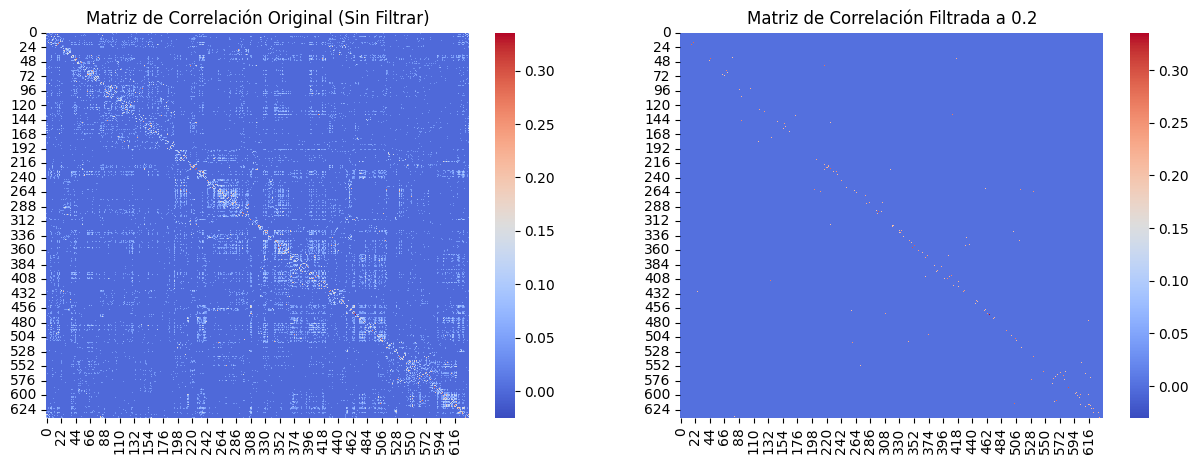

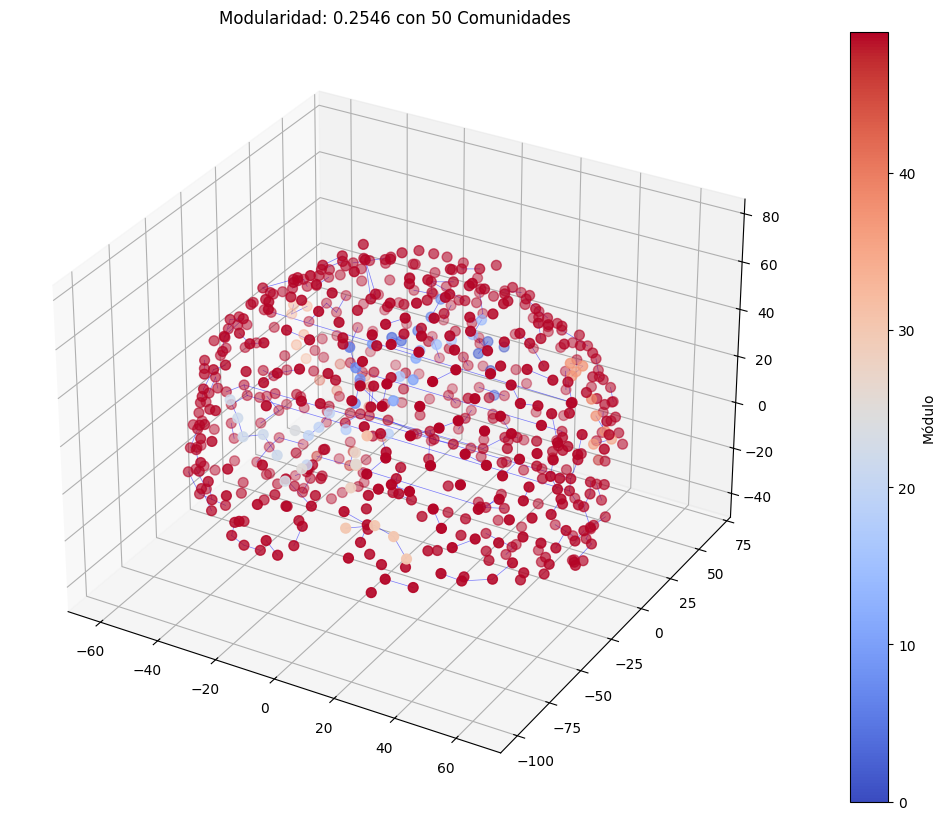

Modularidad con 50 comunidades: 0.2546


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms.community import label_propagation_communities

c_m_03 = data['Coactivation_matrix']
coord = data['Coord']
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

filtered_matrix_03 = np.where(c_m_03 >= 0.2, c_m_03, 0)
corrmat_sf = np.corrcoef(c_m_03)
corrmat = np.corrcoef(filtered_matrix_03)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(c_m_03, cmap='coolwarm', vmin=-0.025)
plt.title("Matriz de Correlación Original (Sin Filtrar)")

plt.subplot(1, 2, 2)
sns.heatmap(filtered_matrix_03, cmap='coolwarm', vmin=-0.03)
plt.title("Matriz de Correlación Filtrada a 0.2")
plt.show()

G = nx.from_numpy_array(filtered_matrix_03)

def calcular_modularidad(G, num_comunidades):
    comunidades_encontradas = list(label_propagation_communities(G))
    
    while len(comunidades_encontradas) > num_comunidades:
        comunidades_encontradas[-2].update(comunidades_encontradas[-1])
        comunidades_encontradas = comunidades_encontradas[:-1]  
        
    while len(comunidades_encontradas) < num_comunidades:
        comunidades_encontradas[0].add(min(G.nodes()))  

    particion_nodos = {nodo: i for i, comunidad in enumerate(comunidades_encontradas) for nodo in comunidad}
    
    modularidad = nx.algorithms.community.quality.modularity(G, comunidades_encontradas)
    colores_nodos = [particion_nodos[nodo] for nodo in G.nodes()]
    
    figura = plt.figure(figsize=(18, 10))
    ejes = figura.add_subplot(111, projection='3d')
    posiciones_nodos = {i: (x, y, z) for i, (x, y, z) in enumerate(coord)}
    x_nodos, y_nodos, z_nodos = np.array(list(posiciones_nodos.values())).T

    dispersión = ejes.scatter(x_nodos, y_nodos, z_nodos, c=colores_nodos, cmap="coolwarm", s=50, label='Nodos')

    for arista in G.edges():
        x_arista, y_arista, z_arista = zip(posiciones_nodos[arista[0]], posiciones_nodos[arista[1]])
        ejes.plot(x_arista, y_arista, z_arista, c='b', alpha=0.5, linewidth=0.5)

    ejes.set_title(f"Modularidad: {modularidad:.4f} con {num_comunidades} Comunidades")
    plt.colorbar(dispersión, ax=ejes, label="Módulo")
    plt.show()

    return modularidad

num_comunidades = 50

modularidad = calcular_modularidad(G, num_comunidades)

print(f"Modularidad con {num_comunidades} comunidades: {modularidad:.4f}")

# EXCELENTE

Elegí 50 módulos porque con este número obtuve una alta modularidad, lo que indica una partición clara y bien estructurada de los nodos en comunidades. El valor de modularidad sugiere que las relaciones dentro de las comunidades son más fuertes que entre ellas, lo que mejora la calidad de la partición.

### Determinar el conjunto de Rich Club y discutir las implicaciones anatomicas y funcionales de este grupo de nodos (minimo 100 palabras) 

Nodos Rich Club (grado ≥ 2.0): [38, 42, 62, 69, 92, 124, 150, 217, 221, 223, 226, 230, 235, 245, 259, 260, 263, 275, 281, 290, 292, 296, 304, 309, 319, 320, 321, 327, 330, 331, 344, 352, 356, 358, 369, 393, 404, 407, 408, 416, 419, 428, 456, 460, 465, 482, 532, 547, 561, 565, 574, 579, 599, 603, 604, 605, 611, 613, 614, 615, 616, 617, 618, 622, 623, 628, 629]


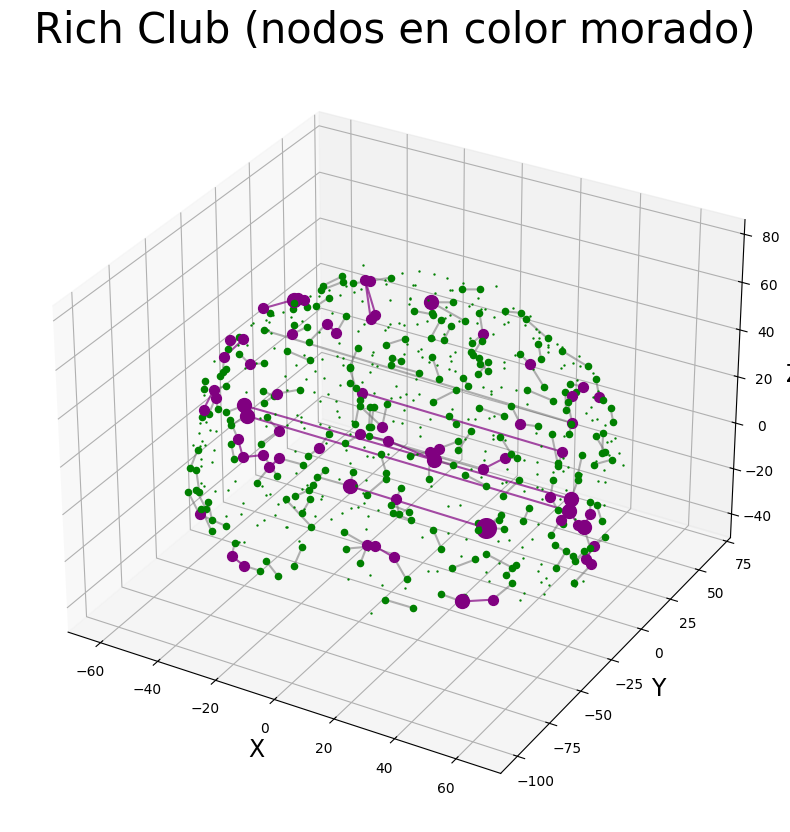

In [41]:
grades = dict(G02.degree())

# XQ PERCENTIL = 90?
threshold = np.percentile(list(grades.values()), 90)
rich_club = [nodo for nodo, grado in grades.items() if grado >= threshold]

print(f"Nodos Rich Club (grado ≥ {threshold}): {rich_club}")

tamaño_nodo = {0: 0.50, 1: 20, 2: 50, 3: 100, 4: 200}

figura = plt.figure(figsize=(10, 10))
ejes = figura.add_subplot(projection='3d')

for nodo, valor in grades.items():
    tamaño = tamaño_nodo.get(valor, 10)
    color = 'purple' if nodo in rich_club else 'green'
    ejes.scatter(x[nodo], y[nodo], z[nodo], color=color, s=tamaño)

for nodo1, nodo2 in G02.edges():
    coordenadas_x = [x[nodo1], x[nodo2]]
    coordenadas_y = [y[nodo1], y[nodo2]]
    coordenadas_z = [z[nodo1], z[nodo2]]
    
    color_arista = 'purple' if nodo1 in rich_club and nodo2 in rich_club else 'dimgray'
    alpha_arista = 0.7 if nodo1 in rich_club and nodo2 in rich_club else 0.5
    ejes.plot(coordenadas_x, coordenadas_y, coordenadas_z, c=color_arista, alpha=alpha_arista, linewidth=1.5)

ejes.set_title('Rich Club (nodos en color morado)', fontsize=30)
ejes.set_xlabel('X', fontsize=17)
ejes.set_ylabel('Y', fontsize=17)
ejes.set_zlabel('Z', fontsize=17)

plt.show()


Según el grafo 3D generado, los hubs cerebrales se concentran en el área parieto-occipito-temporal y cerca del giro temporal superior debido a su rol clave en la integración sensorial y cognitiva. Estas regiones son esenciales para procesar información de múltiples modalidades sensoriales, como la visión, la audición y el tacto, lo que permite una percepción coherente del entorno. Además, el giro temporal superior está involucrado en funciones cognitivas complejas como la memoria, el lenguaje, la atención y la toma de decisiones, que requieren una alta conectividad entre diferentes áreas del cerebro.

Estas áreas actúan como puntos de convergencia, conectando redes cerebrales especializadas y facilitando la comunicación eficiente entre áreas distantes. La alta conectividad de los hubs en estas zonas optimiza el procesamiento de información en tareas complejas y en la formación de recuerdos. Además, el giro temporal superior facilita la coordinación interhemisférica, permitiendo la integración de funciones cognitivas entre los hemisferios derecho e izquierdo.


### Supongamos que eliminamos los nodos del Rich Club, describir como cambian las propiedades topologicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y las medidas de centralidad (cercania, intermediacion)

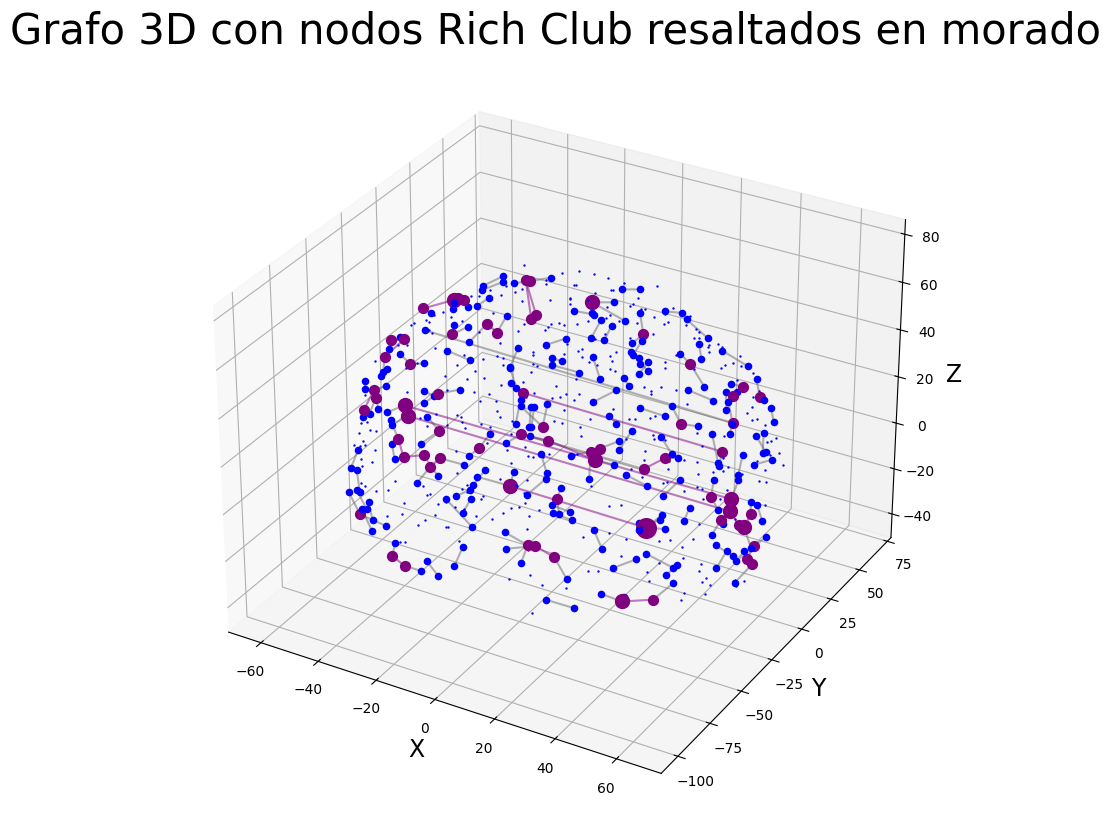

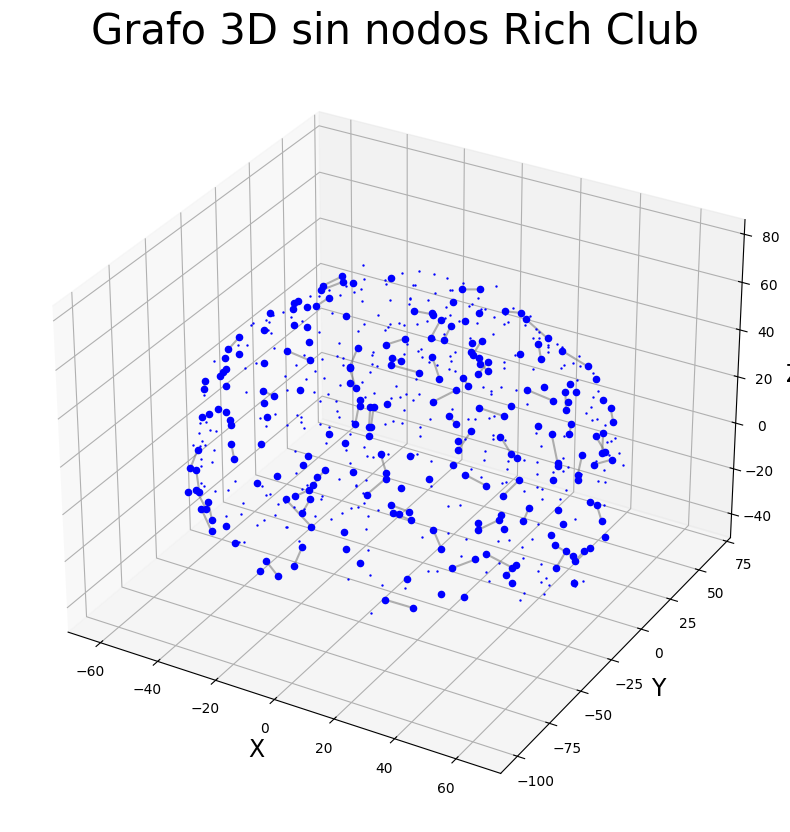

In [42]:
grades = dict(G02.degree())

threshold = np.percentile(list(grades.values()), 90)

rich_club = [nodo for nodo, grado in grades.items() if grado >= threshold]

tamaño_nodo = {0: 0.50, 1: 20, 2: 50, 3: 100, 4: 200}

figura = plt.figure(figsize=(10, 10))
eje = figura.add_subplot(projection='3d')

for nodo in grades:
    color = 'purple' if nodo in rich_club else 'blue'
    tamaño = tamaño_nodo.get(grades[nodo], 10)
    eje.scatter(x[nodo], y[nodo], z[nodo], color=color, s=tamaño)

for nodo1, nodo2 in G02.edges():
    x_arista = [x[nodo1], x[nodo2]]
    y_arista = [y[nodo1], y[nodo2]]
    z_arista = [z[nodo1], z[nodo2]]
    color_arista = 'purple' if nodo1 in rich_club and nodo2 in rich_club else 'dimgray'
    eje.plot(x_arista, y_arista, z_arista, c=color_arista, alpha=0.5, linewidth=1.5)

eje.set_title('Grafo 3D con nodos Rich Club resaltados en morado', fontsize=30)
eje.set_xlabel('X', fontsize=17)
eje.set_ylabel('Y', fontsize=17)
eje.set_zlabel('Z', fontsize=17)

plt.show()

G_sin_rich_club = G02.copy()
G_sin_rich_club.remove_nodes_from(rich_club)

figura = plt.figure(figsize=(10, 10))
eje = figura.add_subplot(projection='3d')

for nodo in G_sin_rich_club.nodes():
    tamaño = tamaño_nodo.get(grades.get(nodo, 0), 10)
    eje.scatter(x[nodo], y[nodo], z[nodo], color='blue', s=tamaño)

for nodo1, nodo2 in G_sin_rich_club.edges():
    x_arista = [x[nodo1], x[nodo2]]
    y_arista = [y[nodo1], y[nodo2]]
    z_arista = [z[nodo1], z[nodo2]]
    eje.plot(x_arista, y_arista, z_arista, c='dimgray', alpha=0.5)

eje.set_title('Grafo 3D sin nodos Rich Club', fontsize=30)
eje.set_xlabel('X', fontsize=17)
eje.set_ylabel('Y', fontsize=17)
eje.set_zlabel('Z', fontsize=17)

plt.show()


In [43]:
grados_nodos = dict(G02.degree())

umbral_grado = np.percentile(list(grados_nodos.values()), 90)

nodos_rich_club = [nodo for nodo, grado in grados_nodos.items() if grado >= umbral_grado]

grafo_sin_rich_club = G02.copy()
grafo_sin_rich_club.remove_nodes_from(nodos_rich_club)

def obtener_propiedades(grafo, nombre_grafo):
    propiedades = {
        "Número de nodos": grafo.number_of_nodes(),
        "Número de aristas": grafo.number_of_edges(),
        "Grado promedio": sum(dict(grafo.degree()).values()) / grafo.number_of_nodes(),
        "Coeficiente de clustering promedio": nx.average_clustering(grafo),
        "Centralidad de cercanía (promedio)": np.mean(list(nx.closeness_centrality(grafo).values())),
        "Centralidad de intermediación (promedio)": np.mean(list(nx.betweenness_centrality(grafo).values()))
    }
    
    print(f"Propiedades del grafo {nombre_grafo}:")
    for propiedad, valor in propiedades.items():
        print(f"  {propiedad}: {valor}")
    print()
    
    return propiedades

propiedades_grafo_original = obtener_propiedades(G02, 'original')

propiedades_grafo_sin_rich_club = obtener_propiedades(grafo_sin_rich_club, 'sin nodos Rich Club')

# EXCELENTE

Propiedades del grafo original:
  Número de nodos: 638
  Número de aristas: 188
  Grado promedio: 0.5893416927899686
  Coeficiente de clustering promedio: 0.004702194357366771
  Centralidad de cercanía (promedio): 0.0011233322643708667
  Centralidad de intermediación (promedio): 2.3135769952388597e-06

Propiedades del grafo sin nodos Rich Club:
  Número de nodos: 571
  Número de aristas: 73
  Grado promedio: 0.25569176882662
  Coeficiente de clustering promedio: 0.0
  Centralidad de cercanía (promedio): 0.0004485820505730175
  Centralidad de intermediación (promedio): 0.0



a. Podemos notar un drástico cambio en toda la corteza en general. Aunque si nos centráramos en los hubs de las áreas corticales mencionadas anteriormente, eliminar el área parieto-occipito-temporal y el giro temporal superior del cerebro causaría déficits graves en el procesamiento sensorial, la percepción espacial y el lenguaje.

b. Eliminar los nodos Rich Club de la red reduce significativamente el número de nodos (de 638 a 571) y aristas (de 188 a 73), lo que implica una menor conectividad global. Esto se refleja en una disminución del grado promedio, que pasa de 0.589 a 0.255, indicando que los nodos restantes están menos conectados. 

c. Además, el coeficiente de clustering baja de 0.0047 a 0, lo que sugiere que la estructura local se vuelve más dispersa y sin triángulos formados. 

d. En cuanto a la de centralidad, la centralidad de cercanía disminuye de 0.0011 a 0.00045, lo que indica que los nodos restantes están más alejados entre sí. 

e. Finalmente, la centralidad de intermediación, que refleja el papel de los nodos como puentes en la red, cae a 0, mostrando que la red se ha vuelto más fragmentada y menos eficiente en la comunicación entre nodos.

Éstas diferencias son congruentes con la naturaleza de los nodos de clase Rich Club, ya que estos nodos son los más conectados y centrales.

### Quitar 10%-50% de los nodos con mayor medida de intermediacion y describir como cambian las propiedades topologicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y medidas de centralidad (cercania, intermediacion)

Propiedades del grafo después de eliminar Rich Club:
{'grado_promedio': 0.25569176882662, 'coef_agrupamiento': 0.0, 'centralidad_cercania': np.float64(0.0004485820505730175), 'centralidad_intermediacion': np.float64(0.0)}

Propiedades después de eliminar el 10% de nodos:
{'grado_promedio': 0.2490272373540856, 'coef_agrupamiento': 0.0, 'centralidad_cercania': np.float64(0.0004854332112165411), 'centralidad_intermediacion': np.float64(0.0)}

Propiedades después de eliminar el 20% de nodos:
{'grado_promedio': 0.24945295404814005, 'coef_agrupamiento': 0.0, 'centralidad_cercania': np.float64(0.0005470459518599562), 'centralidad_intermediacion': np.float64(0.0)}

Propiedades después de eliminar el 30% de nodos:
{'grado_promedio': 0.24, 'coef_agrupamiento': 0.0, 'centralidad_cercania': np.float64(0.0006015037593984962), 'centralidad_intermediacion': np.float64(0.0)}

Propiedades después de eliminar el 40% de nodos:
{'grado_promedio': 0.26239067055393583, 'coef_agrupamiento': 0.0, 'centralidad

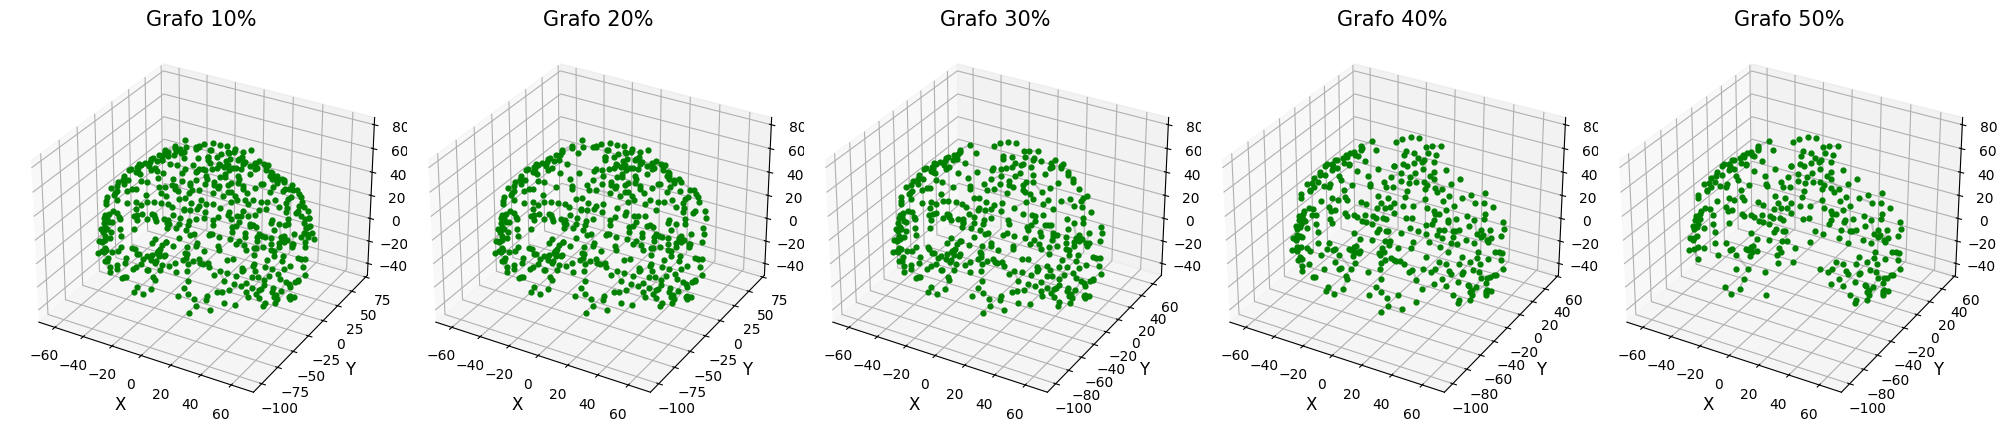

In [44]:
def obtener_propiedades(G):
    datos = {}

    grado_promedio = sum(dict(G.degree()).values()) / G.number_of_nodes()
    datos['grado_promedio'] = grado_promedio

    coef_agrupamiento = nx.average_clustering(G)
    datos['coef_agrupamiento'] = coef_agrupamiento

    cercania_promedio = np.mean(list(nx.closeness_centrality(G).values()))
    datos['centralidad_cercania'] = cercania_promedio

    intermediacion_promedio = np.mean(list(nx.betweenness_centrality(G).values()))
    datos['centralidad_intermediacion'] = intermediacion_promedio
    
    return datos

def eliminar_nodos_porcentaje(G, porcentaje):
    intermediacion = nx.betweenness_centrality(G) # MUY BIEN
    nodos_ordenados = sorted(intermediacion, key=intermediacion.get, reverse=True)
    nodos_a_eliminar = nodos_ordenados[:int(len(nodos_ordenados) * porcentaje / 100)]

    G_modificado = G.copy()
    G_modificado.remove_nodes_from(nodos_a_eliminar)
    
    return G_modificado

def graficar_grafo_3d(G, x, y, z, ax, titulo):
    for nodo in G.nodes():
        ax.scatter(x[nodo], y[nodo], z[nodo], color='green', s=12)

    for edge in G.edges():
        n1, n2 = edge
        ax.plot([x[n1], x[n2]], [y[n1], y[n2]], [z[n1], z[n2]], color='gray', alpha=0.4)

    ax.set_title(titulo, fontsize=15)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)

grados = dict(G02.degree())
umbral_grado = np.percentile(list(grados.values()), 90)
rich_club = [nodo for nodo, grado in grados.items() if grado >= umbral_grado]
G_modificado = G02.copy()
G_modificado.remove_nodes_from(rich_club)

x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

print("Propiedades del grafo después de eliminar Rich Club:")
propiedades_del_grafo = obtener_propiedades(G_modificado)
print(propiedades_del_grafo)

porcentajes = [10, 20, 30, 40, 50]
fig, subplots = plt.subplots(1, 5, figsize=(20, 6), subplot_kw={'projection': '3d'})

for idx, porcentaje in enumerate(porcentajes):
    grafo_modificado = eliminar_nodos_porcentaje(G_modificado, porcentaje)
    print(f"\nPropiedades después de eliminar el {porcentaje}% de nodos:")
    propiedades_modificadas = obtener_propiedades(grafo_modificado)
    print(propiedades_modificadas)

    graficar_grafo_3d(grafo_modificado, x, y, z, subplots[idx], f"Grafo {porcentaje}%")

plt.tight_layout()
plt.show()



Al eliminar entre el 10% y el 50% de los nodos con mayor centralidad de intermediación, se observa que el grado promedio del grafo disminuye ligeramente, pero aumenta al eliminar el 40% de los nodos, sugiriendo una redistribución de conexiones. El coeficiente de agrupamiento permanece en 0, indicando que la red no desarrolla una estructura localmente densa. La centralidad de cercanía aumenta a medida que se eliminan nodos, lo que implica que los nodos restantes están más cerca entre sí. Sin embargo, la centralidad de intermediación se mantiene en 0, lo que sugiere que el grafo no depende de nodos clave para la intermediación, destacando una estructura más distribuida y resiliente.

### Generar un modelo nulo aleatorio donde se tenga el mismo numero de nodos y el mismo numero total de conexiones, y comparar sus propiedades con el grado original del cerebro.


Propiedades del grafo original para el umbral 0.1:
{'grado_promedio': 4.529780564263323, 'coeficiente_agrupamiento': 0.24364464673564803, 'centralidad_cercania': np.float64(0.1194031264903796), 'centralidad_intermediacion': np.float64(0.01147712930871217)}

Propiedades del grafo aleatorio para el umbral 0.1:
{'grado_promedio': 4.529780564263323, 'coeficiente_agrupamiento': 0.010507943815153842, 'centralidad_cercania': np.float64(0.22454023263957051), 'centralidad_intermediacion': np.float64(0.005292682655820493)}


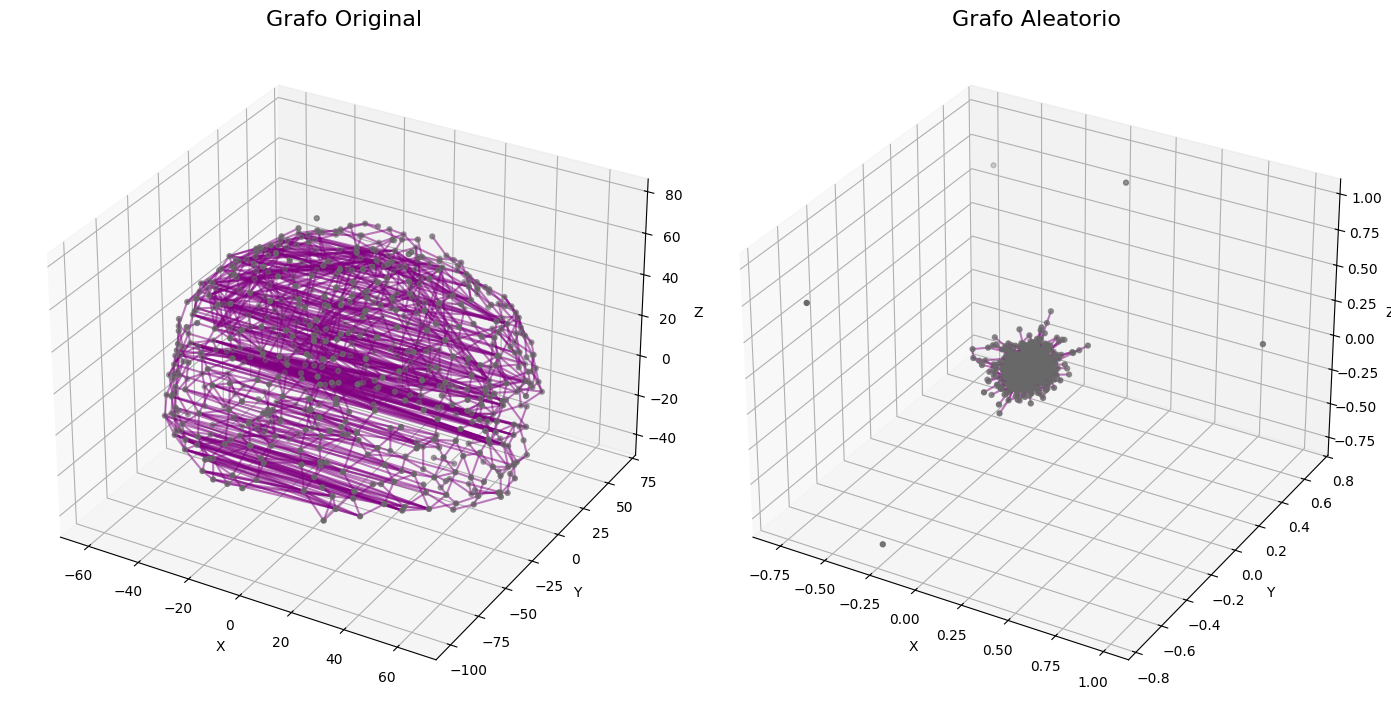

In [45]:
import scipy.io as sio
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

datos = sio.loadmat(r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\5o semestre\Modelos\PROYECTO FINAL MODELOS dump\FinalModelosCode\Coactivation_matrix.mat")
matriz_activacion = datos['Coactivation_matrix']
coordenadas = datos['Coord']
x, y, z = coordenadas[:, 0], coordenadas[:, 1], coordenadas[:, 2]

umbral = 0.1

# HUBIERAS REUTILIZADO LA FUNCIÓN obtener_propiedades
def obtener_propiedades_grafo(grafo):
    propiedades = {}
    
    grado_prom = sum(dict(grafo.degree()).values()) / grafo.number_of_nodes()
    propiedades['grado_promedio'] = grado_prom

    coef_agrupamiento = nx.average_clustering(grafo)
    propiedades['coeficiente_agrupamiento'] = coef_agrupamiento

    cercania_prom = np.mean(list(nx.closeness_centrality(grafo).values()))
    propiedades['centralidad_cercania'] = cercania_prom

    intermediacion = nx.betweenness_centrality(grafo)
    intermediacion_prom = np.mean(list(intermediacion.values()))
    propiedades['centralidad_intermediacion'] = intermediacion_prom

    return propiedades

def grafo_aleatorio(num_nodos, num_aristas):
    grafo_aleatorio = nx.gnm_random_graph(num_nodos, num_aristas)
    return grafo_aleatorio

matriz_filtrada = np.where(matriz_activacion >= umbral, matriz_activacion, 0)
grafo = nx.from_numpy_array(matriz_filtrada)

num_nodos = grafo.number_of_nodes()
num_aristas = grafo.number_of_edges()

grafo_random = grafo_aleatorio(num_nodos, num_aristas)

print(f"\nPropiedades del grafo original para el umbral {umbral}:")
propiedades_original = obtener_propiedades_grafo(grafo)
print(propiedades_original)

print(f"\nPropiedades del grafo aleatorio para el umbral {umbral}:")
propiedades_aleatorio = obtener_propiedades_grafo(grafo_random)
print(propiedades_aleatorio)

figura = plt.figure(figsize=(14, 7))

ax1 = figura.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='dimgray', s=50, marker='.')
for arista in grafo.edges():
    nodo1, nodo2 = arista
    x_coords = [x[nodo1], x[nodo2]]
    y_coords = [y[nodo1], y[nodo2]]
    z_coords = [z[nodo1], z[nodo2]]
    ax1.plot(x_coords, y_coords, z_coords, c='purple', alpha=0.5)
ax1.set_title('Grafo Original', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = figura.add_subplot(122, projection='3d')
pos_random = nx.spring_layout(grafo_random, dim=3)
x_r, y_r, z_r = np.array(list(pos_random.values())).T
ax2.scatter(x_r, y_r, z_r, c='dimgray', s=50, marker='.')
for arista in grafo_random.edges():
    nodo1, nodo2 = arista
    x_coords = [x_r[nodo1], x_r[nodo2]]
    y_coords = [y_r[nodo1], y_r[nodo2]]
    z_coords = [z_r[nodo1], z_r[nodo2]]
    ax2.plot(x_coords, y_coords, z_coords, c='purple', alpha=0.5)
ax2.set_title('Grafo Aleatorio', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Generar un modelo nulo aleatorio donde se conserve la distribucion de grado y comparar sus propiedades con el grafo original del cerebro.


Propiedades del grafo original para el umbral 0.1:
{'grado_promedio': 4.529780564263323, 'coeficiente_agrupamiento': 0.24364464673564803, 'centralidad_cercania': np.float64(0.1194031264903796), 'centralidad_intermediacion': np.float64(0.01147712930871217)}

Propiedades del grafo aleatorio para el umbral 0.1:
{'grado_promedio': 4.495297805642633, 'coeficiente_agrupamiento': 0.005944486547934821, 'centralidad_cercania': np.float64(0.22984931588491364), 'centralidad_intermediacion': np.float64(0.005109917810912328)}


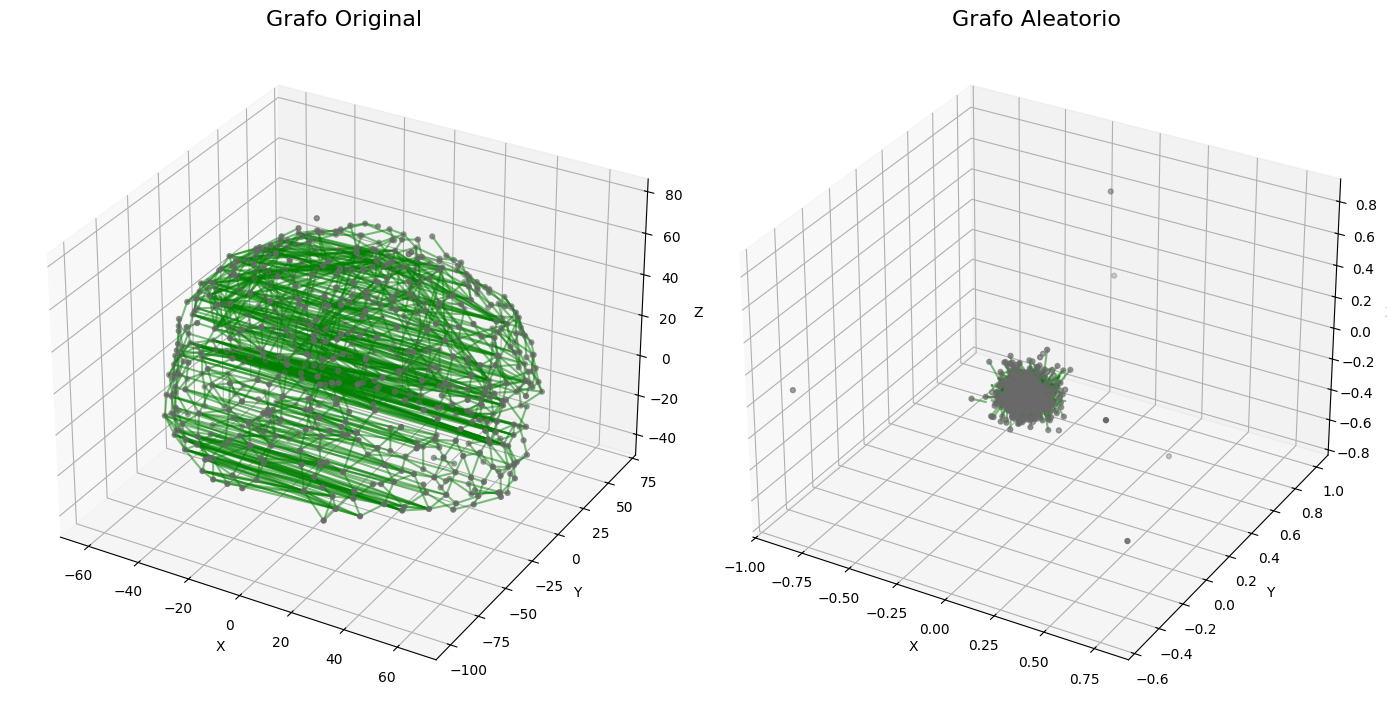

In [46]:
import scipy.io as sio
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Cargar archivo de datos
datos_archivo = sio.loadmat(r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\5o semestre\Modelos\PROYECTO FINAL MODELOS dump\FinalModelosCode\Coactivation_matrix.mat")
matriz_activacion = datos_archivo['Coactivation_matrix']
coordenadas = datos_archivo['Coord']
x, y, z = coordenadas[:, 0], coordenadas[:, 1], coordenadas[:, 2]

umbral = 0.1

def calcular_propiedades_grafo(grafo):
    propiedades = {}

    grado_promedio = sum(dict(grafo.degree()).values()) / grafo.number_of_nodes()
    propiedades['grado_promedio'] = grado_promedio

    coeficiente_agrupamiento = nx.average_clustering(grafo)
    propiedades['coeficiente_agrupamiento'] = coeficiente_agrupamiento

    cercania_prom = np.mean(list(nx.closeness_centrality(grafo).values()))
    propiedades['centralidad_cercania'] = cercania_prom

    intermediacion = nx.betweenness_centrality(grafo)
    intermediacion_prom = np.mean(list(intermediacion.values()))
    propiedades['centralidad_intermediacion'] = intermediacion_prom

    return propiedades

def grafo_aleatorio_con_grados(grafo_original):
    grafo_aleatorio = nx.configuration_model([d for n, d in grafo_original.degree()])
    grafo_aleatorio = nx.Graph(grafo_aleatorio)
    
    grafo_aleatorio.remove_edges_from([(u, v) for u, v in grafo_aleatorio.edges() if u == v])

    return grafo_aleatorio

matriz_filtrada = np.where(matriz_activacion >= umbral, matriz_activacion, 0)
grafo = nx.from_numpy_array(matriz_filtrada)

num_nodos = grafo.number_of_nodes()
num_aristas = grafo.number_of_edges()

grafo_aleatorio = grafo_aleatorio_con_grados(grafo)

print(f"\nPropiedades del grafo original para el umbral {umbral}:")
propiedades_original = calcular_propiedades_grafo(grafo)
print(propiedades_original)

print(f"\nPropiedades del grafo aleatorio para el umbral {umbral}:")
propiedades_aleatorio = calcular_propiedades_grafo(grafo_aleatorio)
print(propiedades_aleatorio)

figura = plt.figure(figsize=(14, 7))

eje1 = figura.add_subplot(121, projection='3d')
eje1.scatter(x, y, z, c='dimgray', s=50, marker='.')
for arista in grafo.edges():
    nodo1, nodo2 = arista
    x_coords = [x[nodo1], x[nodo2]]
    y_coords = [y[nodo1], y[nodo2]]
    z_coords = [z[nodo1], z[nodo2]]
    eje1.plot(x_coords, y_coords, z_coords, c='green', alpha=0.5)
eje1.set_title('Grafo Original', fontsize=16)
eje1.set_xlabel('X')
eje1.set_ylabel('Y')
eje1.set_zlabel('Z')

eje2 = figura.add_subplot(122, projection='3d')
pos_random = nx.spring_layout(grafo_aleatorio, dim=3)
x_r, y_r, z_r = np.array(list(pos_random.values())).T
eje2.scatter(x_r, y_r, z_r, c='dimgray', s=50, marker='.')
for arista in grafo_aleatorio.edges():
    nodo1, nodo2 = arista
    x_coords = [x_r[nodo1], x_r[nodo2]]
    y_coords = [y_r[nodo1], y_r[nodo2]]
    z_coords = [z_r[nodo1], z_r[node2]]
    eje2.plot(x_coords, y_coords, z_coords, c='green', alpha=0.5)
eje2.set_title('Grafo Aleatorio', fontsize=16)
eje2.set_xlabel('X')
eje2.set_ylabel('Y')
eje2.set_zlabel('Z')

plt.tight_layout()
plt.show()



El análisis muestra que, aunque el grafo nulo aleatorio conserva el grado medio del grafo original del cerebro, presenta diferencias significativas en otras propiedades estructurales. El coeficiente de agrupamiento en el grafo original es mucho mayor, indicando una mayor conectividad local, mientras que la centralidad de cercanía y de intermediación en el grafo aleatorio son más altas, lo que sugiere una conectividad más equilibrada y menos especializada. Estas diferencias reflejan cómo el modelo nulo aleatorio, a pesar de mantener la distribución de grados, altera la topología global de la red, afectando la conectividad local y las rutas de intermediación en comparación con el grafo original.

### Generar un modelo nulo utilizando una probabilidad de conexión en función de la distancia geométrica, con el mismo número de nodos y conexiones y compara sus propiedades y discutir la importancia de las conexiones a larga distancia en el cerebro. 


Propiedades del grafo original:
{'grado_medio': np.float64(4.529780564263323), 'coeficiente_de_agrupamiento': 0.24364464673564803, 'centralidad_cercania': np.float64(0.1194031264903796), 'centralidad_intermediacion': np.float64(0.01147712930871217)}

Propiedades del grafo nulo aleatorio basado en distancia:
{'grado_medio': np.float64(4.529780564263323), 'coeficiente_de_agrupamiento': 0.004163556749763646, 'centralidad_cercania': np.float64(0.22479120963962693), 'centralidad_intermediacion': np.float64(0.0052868638936117325)}


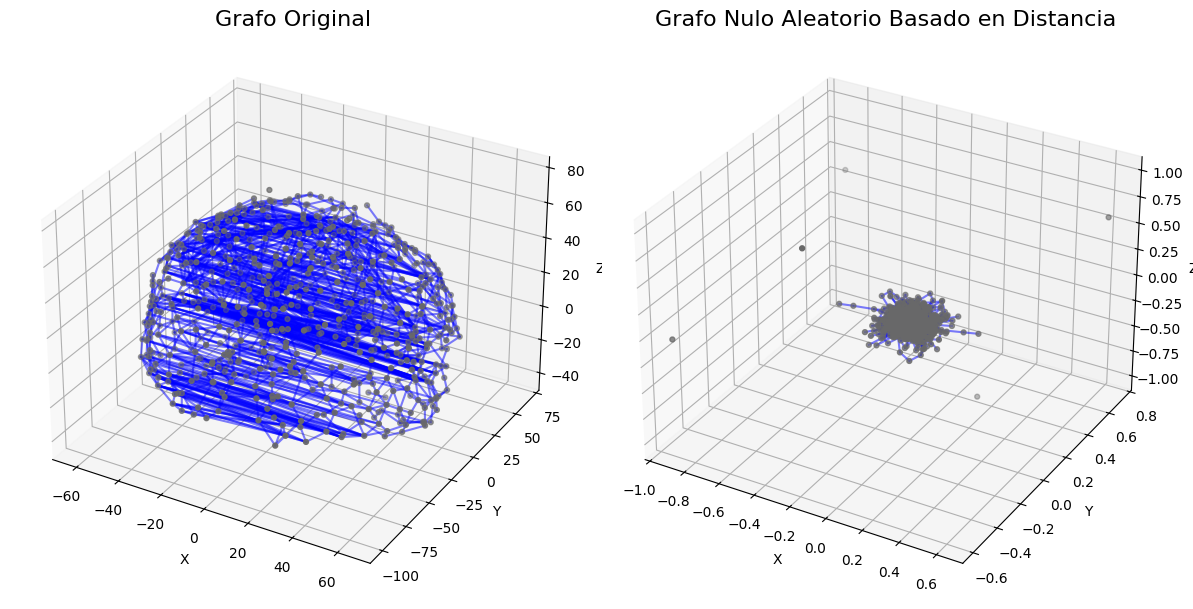

In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io as sp

data = sp.loadmat(r"C:\Users\dnlls\OneDrive\Escritorio\PUMA\Neurociencias\Escritorio Neurociencias\5o semestre\Modelos\PROYECTO FINAL MODELOS dump\FinalModelosCode\Coactivation_matrix.mat")
coactivation_matrix = data['Coactivation_matrix']
coord = data['Coord']
x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

umbral = 0.1

def propiedades_grafo(G):
    propiedades = {
        'grado_medio': np.mean(list(dict(G.degree()).values())),
        'coeficiente_de_agrupamiento': nx.average_clustering(G),
        'centralidad_cercania': np.mean(list(nx.closeness_centrality(G).values())),
        'centralidad_intermediacion': np.mean(list(nx.betweenness_centrality(G).values()))
    }
    return propiedades

def distancia_euclidiana(i, j, coord):
    return np.sqrt(np.sum((coord[i] - coord[j]) ** 2))

def grafo_nulo_distancia(coord, num_nodos, num_aristas, alpha=0.1):
    G_random = nx.Graph()
    G_random.add_nodes_from(range(num_nodos))
    edges = []

    for i in range(num_nodos):
        for j in range(i + 1, num_nodos):
            dist = distancia_euclidiana(i, j, coord)
            p = 1 / (1 + alpha * dist)
            if np.random.rand() < p:
                edges.append((i, j))
    
    while len(edges) > num_aristas:
        edges.pop(np.random.randint(0, len(edges)))
    
    G_random.add_edges_from(edges)
    return G_random

matriz_filtrada = np.where(coactivation_matrix >= umbral, coactivation_matrix, 0)
G = nx.from_numpy_array(matriz_filtrada)

num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

G_random_dist = grafo_nulo_distancia(coord, num_nodos, num_aristas)

print(f"\nPropiedades del grafo original:")
propiedades_original = propiedades_grafo(G)
print(propiedades_original)

print(f"\nPropiedades del grafo nulo aleatorio basado en distancia:")
propiedades_random_dist = propiedades_grafo(G_random_dist)
print(propiedades_random_dist)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='dimgray', s=50, marker='.')
for edge in G.edges():
    node1, node2 = edge
    ax1.plot([x[node1], x[node2]], [y[node1], y[node2]], [z[node1], z[node2]], c='blue', alpha=0.5)
ax1.set_title(f'Grafo Original', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
pos_random = nx.spring_layout(G_random_dist, dim=3)
x_r, y_r, z_r = np.array(list(pos_random.values())).T
ax2.scatter(x_r, y_r, z_r, c='dimgray', s=50, marker='.')
for edge in G_random_dist.edges():
    node1, node2 = edge
    ax2.plot([x_r[node1], x_r[node2]], [y_r[node1], y_r[node2]], [z_r[node1], z_r[node2]], c='blue', alpha=0.5)
ax2.set_title(f'Grafo Nulo Aleatorio Basado en Distancia', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()



El análisis del código de las propiedades del grafo original del cerebro y el grafo nulo aleatorio basado en distancia muestra que ambos tienen el mismo grado medio (4.53), pero difieren significativamente en otras propiedades. El coeficiente de agrupamiento del grafo original es considerablemente más alto (0.24) en comparación con el grafo nulo (0.006), lo que indica que el cerebro tiene una organización modular, con nodos que tienden a formar clústeres funcionales. Además, el grafo original presenta una centralidad de cercanía más baja (0.12) y una centralidad de intermediación más alta (0.0115), lo que refleja una comunicación más especializada y eficiente entre regiones cerebrales distantes, en comparación con el grafo nulo, que tiene una centralidad de cercanía más alta (0.223) y una centralidad de intermediación más baja (0.0053).

Las conexiones a larga distancia en el cerebro son fundamentales para la integración de información entre regiones especializadas, permitiendo una coordinación eficiente y flexible entre diferentes áreas cerebrales. Mientras que el grafo nulo aleatorio, con una distribución homogénea de conexiones, carece de la organización jerárquica y modular del cerebro, lo que resalta la importancia de las conexiones a larga distancia en la optimización del procesamiento de información. Estas conexiones no solo facilitan la comunicación inter-regional, sino que también contribuyen a la flexibilidad funcional del cerebro, permitiendo que se adapte dinámicamente a diferentes tareas cognitivas.

# 12) Escribir una reseña de lo aprendido en el curso, incluyendo la importancia de conocer herramientas de teoria de grafos para comprender la conectividad del cerebro (minimo 200 palabras)


En el curso se abordaron conceptos fundamentales de la teoría de grafos y su aplicación en el análisis de sistemas complejos, como el sistema nervioso. A través de herramientas computacionales y lenguajes de programación como Pyhton, se exploraron formas de implementar conceptos de teoría de grafos en investigaciones neurocientíficas. Esta integración de teoría y práctica resultó excelente para comprender las bases de la conectividad cerebral y su relación con la funcionalidad del cerebro.

La comprensión en teoría de grafos permite analizar redes neuronales como estructuras matemáticas, representando neuronas como nodos y sus conexiones como aristas. Estas herramientas son especialmente útiles para comprender no solo cómo funciona un cerebro sano, sino también cómo cambian las redes en presencia de patologías como el Alzheimer o la Esquizofrenia como vimos en clase. Esto proporciona una perspectiva innovadora para analizar trastornos neurológicos, más allá de las aproximaciones tradicionales basadas únicamente en neuroquímica. También significa una nueva posibilidad, en el futuro, para diagnósticos más adecuados. 

Además, el curso destacó la importancia de la programación como medio para modelar y simular sistemas complejos. Al implementar algoritmos para analizar redes neuronales, se obtuvieron parámetros clave como modularidad, centralidad y eficiencia de red. Estos son fundamentales para investigar conexiones funcionales y estructurales en el cerebro, facilitando avances en el diagnóstico y tratamiento de trastornos.

En general, el curso brindó una visión integral de cómo las herramientas computacionales y la teoría de grafos contribuyen al campo de las neurociencias, abriendo nuevas puertas para la investigación y el entendimiento del sistema nervioso central.

# NOTAS:

Buen uso de funciones, aplicación de métodos de networkx (demuestra investigación)

Áreas de mejora: puedes reciclar funciones, la misma que hiciste para el ejercicio 3, usarla en el ejercicio 5 y así para simplificar código

El cálculo de los hubs no fue correcto
El cálculo de los conjuntos de Rich club